## Introduction

In this project, we explore a text analysis on the renowned novel *Notes From Underground* by Fyodor Dostoyevsky. The primary objective of the analysis was to examine the most frequent words in the text and draw insights into the underlying themes of the novel. The analysis was conducted through the following steps:

1. **Text Download and Scraping**: We used the `requests` library to fetch the full text of *Moby Dick* from Project Gutenberg (available [here](https://www.gutenberg.org/cache/epub/600/pg600.txt)). To extract the main body of the text, we employed the BeautifulSoup library for web scraping.
   
2. **Text Cleaning**: The raw text was cleaned by removing unnecessary line spaces (`\n`) and extra spaces. This helped in ensuring that the text was uniform and ready for analysis. The cleaning functions used were designed to:
   - Remove line spaces and extra spaces
   - Convert the text to lowercase to standardize the analysis

3. **Text Preprocessing**: We leveraged the powerful `spaCy` library for lemmatization and stopword removal. This preprocessing step was essential for reducing the text to its meaningful components, such as nouns and verbs, while discarding common words that don't add value to the analysis.

4. **Frequency Analysis**: Using the NLTK library, we calculated the frequency distribution of words in the cleaned text. This allowed us to identify the 20 most common words, providing valuable insight into the key themes and subjects present in the novel.

---

### Import Libraries:

In [1]:
import requests
from bs4 import BeautifulSoup
import nltk
import spacy

from nltk.probability import FreqDist

### Web Scraping:

In [3]:
# Retrieving the textual data from webpage
URL = "https://www.gutenberg.org/cache/epub/600/pg600.txt"

response = requests.get(URL)

# Check Data is retrieved
if response.status_code == 200:
  html_content = response.text

else:
  print("Failed to retrieve the webpage.")

Successfuly retrieved text data for Novel (Notes from underground).

In [4]:
# Webpage Scraping using BeautifulSoup library
soup = BeautifulSoup(html_content, 'html5lib')
text = soup.get_text()
text[:1000]

'\ufeffThe Project Gutenberg eBook of Notes from the Underground\n    \nThis ebook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this ebook or online\nat www.gutenberg.org. If you are not located in the United States,\nyou will have to check the laws of the country where you are located\nbefore using this eBook.\n\nTitle: Notes from the Underground\n\nAuthor: Fyodor Dostoyevsky\n\nRelease date: July 1, 1996 [eBook #600]\n                Most recently updated: December 26, 2021\n\nLanguage: English\n\nCredits: Judith Boss. HTML version by Al Haines\n\n\n*** START OF THE PROJECT GUTENBERG EBOOK NOTES FROM THE UNDERGROUND ***\n\n\n\n\nNotes from the Underground\n\nby Fyodor Dostoyevsky\n\n\nContents\n\n NOTES FROM THE UNDERGROUND\n\n PART I Underground\n I\n II\n III\n IV\n V\n VI\n VI

In [6]:
# Filtering the main text and removing unwanted text
starts = text.find('I am a sick man')
ends = text.find('End of the Project Gutenberg EBook')

text = text[starts:ends]
text[1000:2000]

'rty. I used to be in the government service, but am no longer. I was\na spiteful official. I was rude and took pleasure in being so. I did\nnot take bribes, you see, so I was bound to find a recompense in that,\nat least. (A poor jest, but I will not scratch it out. I wrote it\nthinking it would sound very witty; but now that I have seen myself\nthat I only wanted to show off in a despicable way, I will not scratch\nit out on purpose!)\n\nWhen petitioners used to come for information to the table at which I\nsat, I used to grind my teeth at them, and felt intense enjoyment when\nI succeeded in making anybody unhappy. I almost did succeed. For the\nmost part they were all timid people—of course, they were petitioners.\nBut of the uppish ones there was one officer in particular I could not\nendure. He simply would not be humble, and clanked his sword in a\ndisgusting way. I carried on a feud with him for eighteen months over\nthat sword. At last I got the better of him. He left off clan

We have got the main text but somehow we are required to remove the linespace '\n' word.

### Text Preprocessing:

In [9]:
# Remove the linespace and extra space if possible
def remove_line_space(text):
  filtered = text.replace('\n', ' ').strip()
  return filtered

def remove_extra_space(text):
  return ' '.join(text.split())

def clean_text(text):
  if isinstance(text, str):
    text = remove_line_space(text)
    text = remove_extra_space(text)
    text = text.lower()
    return text

In [10]:
# Clean the main text
cleaned_text = clean_text(text)
cleaned_text[:1000]

'i am a sick man.... i am a spiteful man. i am an unattractive man. i believe my liver is diseased. however, i know nothing at all about my disease, and do not know for certain what ails me. i don’t consult a doctor for it, and never have, though i have a respect for medicine and doctors. besides, i am extremely superstitious, sufficiently so to respect medicine, anyway (i am well-educated enough not to be superstitious, but i am superstitious). no, i refuse to consult a doctor from spite. that you probably will not understand. well, i understand it, though. of course, i can’t explain who it is precisely that i am mortifying in this case by my spite: i am perfectly well aware that i cannot “pay out” the doctors by not consulting them; i know better than anyone that by all this i am only injuring myself and no one else. but still, if i don’t consult a doctor it is from spite. my liver is bad, well—let it get worse! i have been going on like that for a long time—twenty years. now i am fo

In [11]:
# Remove stopwords and Lemmatize text data
nlp = spacy.load("en_core_web_sm")

nlp.max_length = len(cleaned_text) + 100

def preprocess_text_spacy(text):
    """
    Preprocess text using spaCy:
    - Tokenize the text
    - Remove stopwords
    - Keep only alphabetic words
    - Perform lemmatization
    """
    doc = nlp(text)
    filtered = [
        token.lemma_ for token in doc
        if token.is_alpha and not token.is_stop
    ]
    return filtered
cleaned_text = preprocess_text_spacy(cleaned_text)
cleaned_text[:10]

['sick',
 'man',
 'spiteful',
 'man',
 'unattractive',
 'man',
 'believe',
 'liver',
 'diseased',
 'know']

### Analyze the word Frequency:

In [13]:
# Calculate the word frequency
freq_dist = FreqDist(cleaned_text)
# Display the 20 most common frequent word in Notes from Underground novel
freq_dist.most_common(20)

[('know', 165),
 ('man', 143),
 ('come', 127),
 ('look', 113),
 ('time', 110),
 ('work', 102),
 ('love', 96),
 ('go', 90),
 ('like', 87),
 ('begin', 87),
 ('project', 85),
 ('gutenberg', 85),
 ('think', 82),
 ('course', 73),
 ('thing', 72),
 ('life', 71),
 ('day', 70),
 ('feel', 69),
 ('simply', 69),
 ('want', 64)]

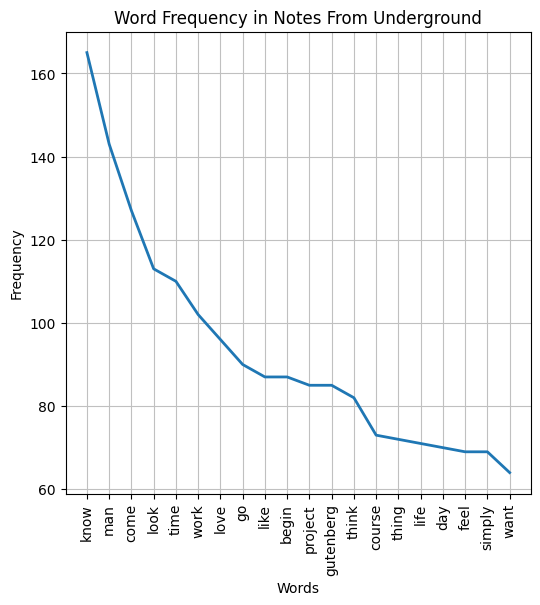

In [14]:
import matplotlib.pyplot as plt
# Plot Frequency Distribution
plt.figure(figsize = (6,6))
freq_dist.plot(20, title="Word Frequency in Notes From Underground")
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

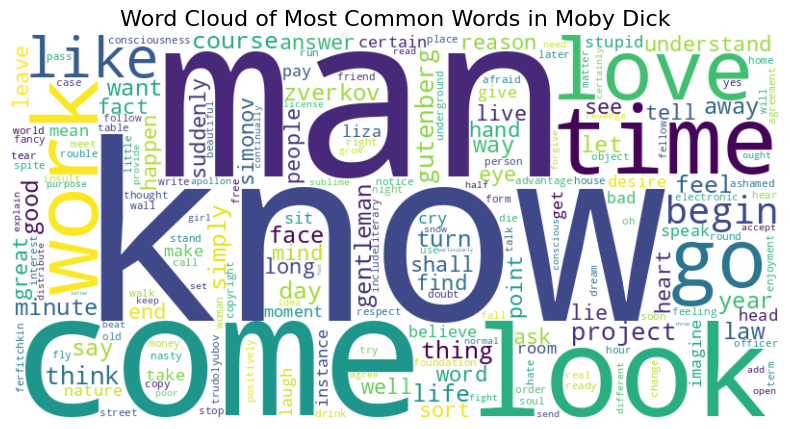

In [15]:
# Word cloud
from wordcloud import WordCloud
# Creating the Dictionary
freq_dict = {}
for words, values in freq_dist.items():
  freq_dict[words] = values

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dict)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Common Words in Moby Dick", fontsize=16)
plt.show()

The results show that this novel revolves around the knowing, man and look. Why these words? Because these words carry the whole theme that defines the slef thinking of the author. Whereas words like love, work and time define topics that author is talking. Such as, Author may be defining the situation defining love, work and time.
Therefore, what can we conclude is that words like know, man, look and come are more of kind used in the observing and thinking. So this novel might be about the observation or Philosophical because of no action and other characters names.

### Conclusion:
The analysis of the most frequent words in Notes from Underground suggests that the novel is deeply introspective and philosophical in nature. Words like know, man, look, and come dominate the text, highlighting themes of observation, self-awareness, and reflection. These words indicate a narrative focused on the internal thought process of the author or protagonist, emphasizing a contemplative and analytical perspective.

On the other hand, words such as love, work, and time suggest topics of discussion within the narrative, potentially addressing the human condition, societal roles, or existential concerns. The absence of action-oriented words or character names further supports the idea that this novel is not driven by events or interactions but rather by internal monologues and philosophical musings.

In conclusion, the frequent use of reflective and observational words points to Notes from Underground as a text centered on introspection, observation, and philosophical exploration, with minimal focus on external actions or character dynamics.